In [1]:
import numpy as np
import os
from netCDF4 import Dataset

In [2]:
import os, sys
module_path = os.path.abspath(os.path.join('/global/common/software/ProjectDisCo/'))
sys.path.append(module_path)

from source.visuals import *
%matplotlib inline

In [3]:
def load_fields(observable, result, start, end, state=None):
    '''
    Returns tuple (observable_field, state_field) of ndarrays of observable and local causal state 
    spacetime fields, in that order, for the given observable and result, and for the given 
    start and end time steps.
    
    Start should be a multiple of eight, otherwise it will be set to the next lowest multiple of eight.
    '''
    if state is None:
        state = observable
    if observable == 'IVT':
        run_dir = "/global/cscratch1/sd/mwehner/machine_learning_climate_data/All-Hist/CAM5-1-0.25degree_All-Hist_est1_v3_run1/IVT/"
    else:
        run_dir = "/global/project/projectdirs/dasrepo/gmd/input/ALLHIST/run1/"
    obs_fields = []
    lcsdir = "/global/project/projectdirs/ProjectDisCo/Adam/climate/{}/result-{}/fields/".format(state,result)
    lcsfiles = sorted(os.listdir(lcsdir))
    lcs_fields = []
    if start < 8:
        start = 0
    else:
        start = start-start%8
    indices = np.arange(start, end)
    
    for i in indices:
        s_field = np.load(lcsdir+lcsfiles[i])
        lcs_fields.append(s_field)
        index = i%8
        if index == 0:
            s = lcsfiles[i]
            obs_name = s[:-6]+'00000.nc'
            obs_load = Dataset(run_dir+obs_name, 'r')[observable][:]
        obs_field = obs_load[index]
        obs_fields.append(obs_field)
    state_field = np.vstack(lcs_fields)
    field = np.stack(obs_fields)
    
    return(field, state_field)

def load_state_fields(observable, result, start, end):
    '''
    Returns tuple (observable_field, state_field) of ndarrays of observable and local causal state 
    spacetime fields, in that order, for the given observable and result, and for the given 
    start and end time steps.
    
    Start should be a multiple of eight, otherwise it will be set to the next lowest multiple of eight.
    '''
    lcsdir = "/global/project/projectdirs/ProjectDisCo/Adam/climate/{}/result-{}/fields/".format(observable,result)
    lcsfiles = sorted(os.listdir(lcsdir))
    lcs_fields = []
    if start < 8:
        start = 0
    else:
        start = start-start%8
    indices = np.arange(start, end)
    
    for i in indices:
        s_field = np.load(lcsdir+lcsfiles[i])
        lcs_fields.append(s_field)
    state_field = np.vstack(lcs_fields)
    
    return state_field

In [4]:
tmq, tmq_states = load_fields('TMQ', 8, 100, 120)

<ipython-input-3-fec1c16bf066>:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obs_load = Dataset(run_dir+obs_name, 'r')[observable][:]


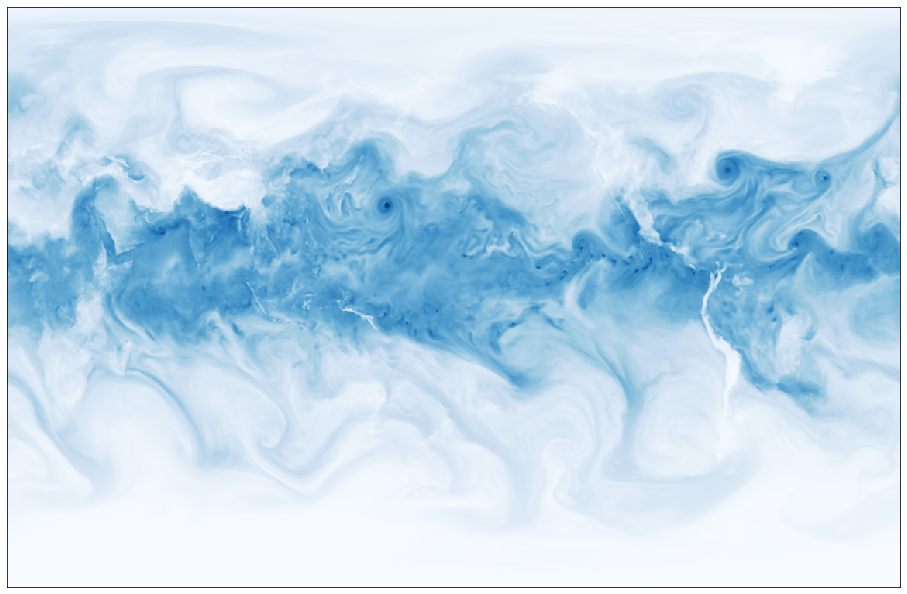

In [5]:
diagram(tmq[20], ticks=False, invert_y=False, cmap=plt.cm.Blues)
plt.savefig('tmq_field.pdf', bbox_inches='tight')

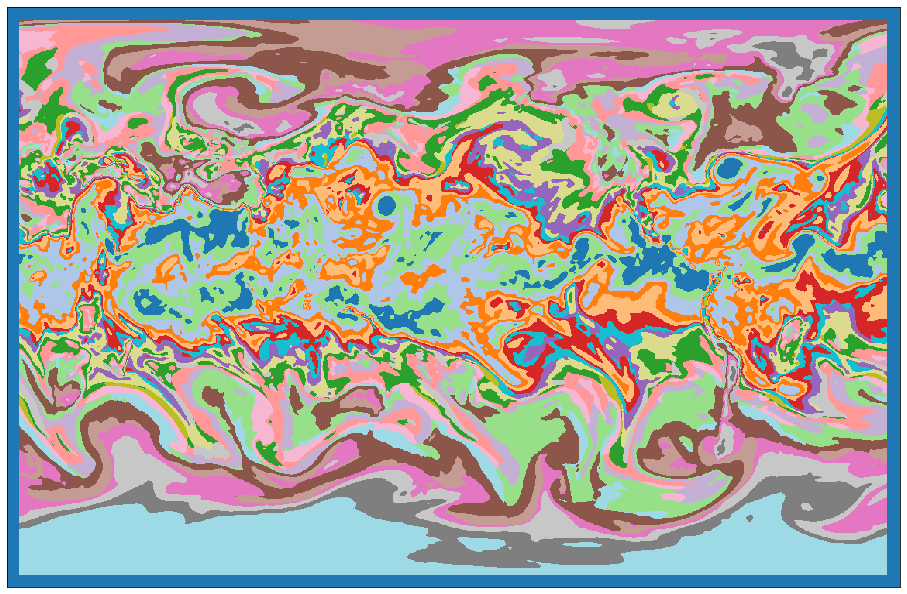

In [6]:
diagram(tmq_states[20], ticks=False, invert_y=False, cmap=plt.cm.tab20)
plt.savefig('tmq_states-8.pdf', bbox_inches='tight')

In [7]:
tmq_psl = load_state_fields('TMQ_PSL', 4, 100, 120)

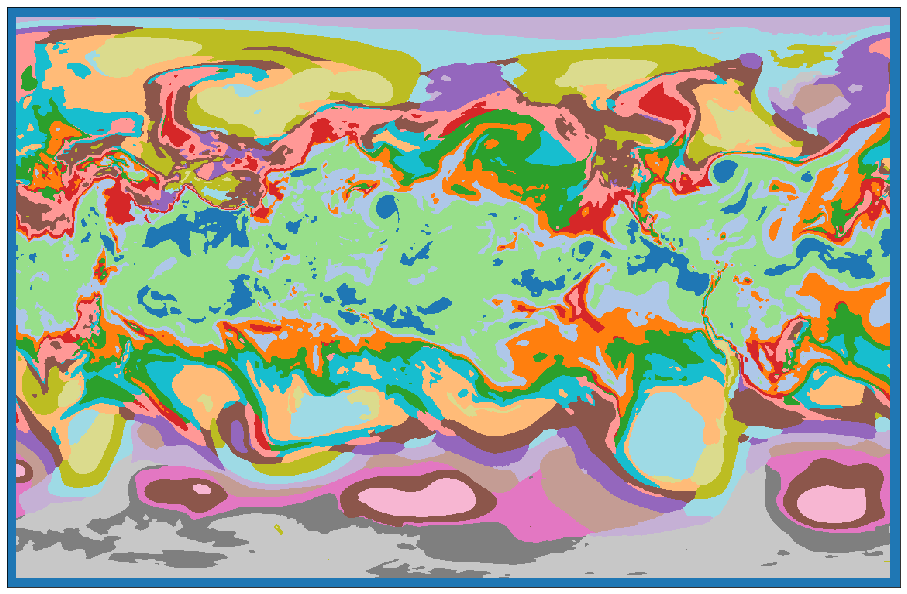

In [8]:
diagram(tmq_psl[14], ticks=False, invert_y=False, cmap=plt.cm.tab20)
plt.savefig('tmq_psl_states-4.pdf', bbox_inches='tight')

In [9]:
psl, psl_states = load_fields('PSL', 3, 100, 120)

<ipython-input-3-fec1c16bf066>:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obs_load = Dataset(run_dir+obs_name, 'r')[observable][:]


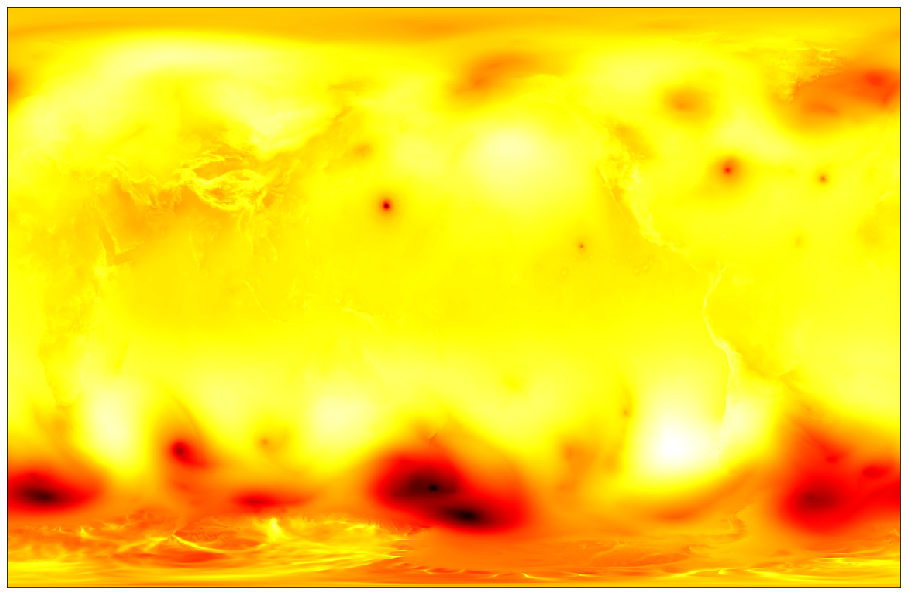

In [10]:
diagram(psl[20], ticks=False, invert_y=False, cmap=plt.cm.hot)
plt.savefig('psl_field.pdf', bbox_inches='tight')

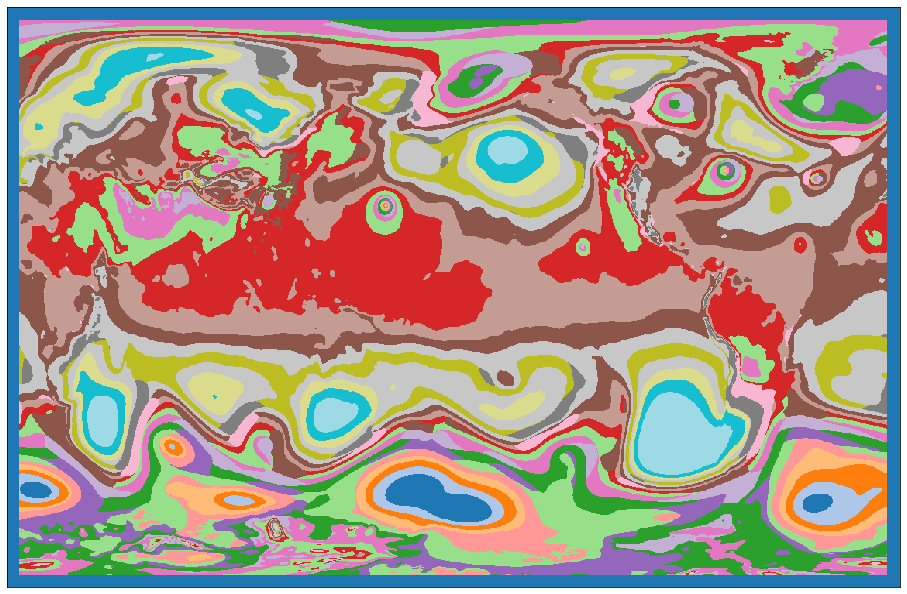

In [11]:
diagram(psl_states[20], ticks=False, invert_y=False, cmap=plt.cm.tab20)
plt.savefig('psl_states-3.pdf', bbox_inches='tight')

## Hurricane Tracker using IVT Decomposition

In [22]:
tmq, tmq_states = load_fields('TMQ', 8, 100, 120)

<ipython-input-3-fec1c16bf066>:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obs_load = Dataset(run_dir+obs_name, 'r')[observable][:]


In [5]:
ivt_states = load_state_fields('IVT', 8, 100, 120)

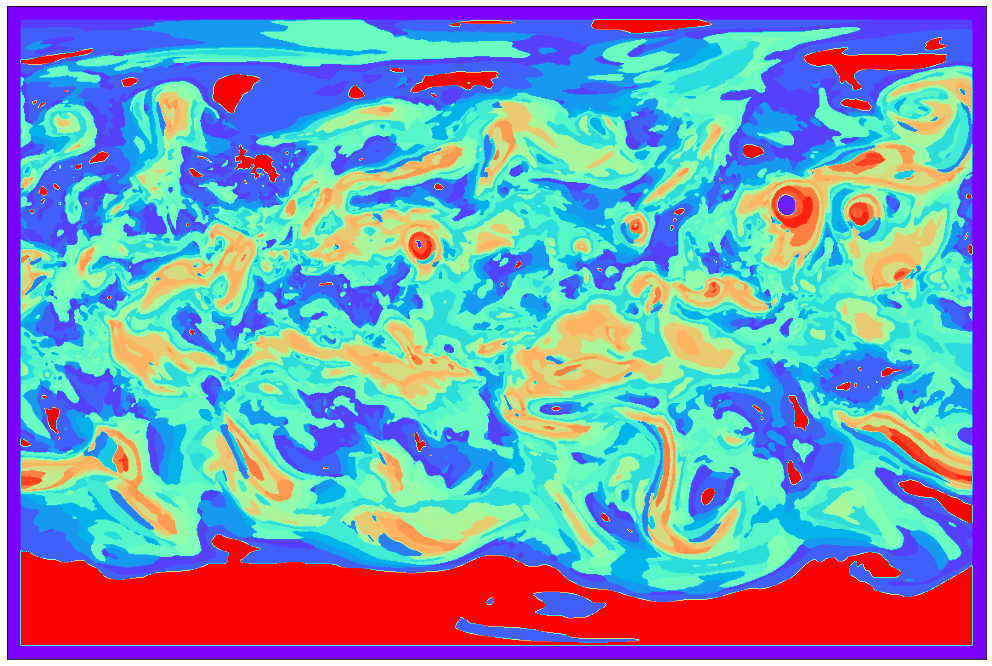

In [14]:
H,W = np.shape(tmq[0])
size = 18
fig, ax = plt.subplots(figsize = (size, (H/W)*size))
ax.imshow(ivt_states[0], cmap=plt.cm.rainbow)
ax.invert_yaxis()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
plt.savefig('ivt_states-8.pdf', bbox_inches='tight')

In [18]:
maskedIVT = np.zeros(np.shape(ivt_states), dtype=int)
maskedIVT[ivt_states==21] = 1
maskedIVT[ivt_states==1] = 1

In [19]:
masked = np.ma.masked_array(maskedIVT[0], maskedIVT[0]==1)

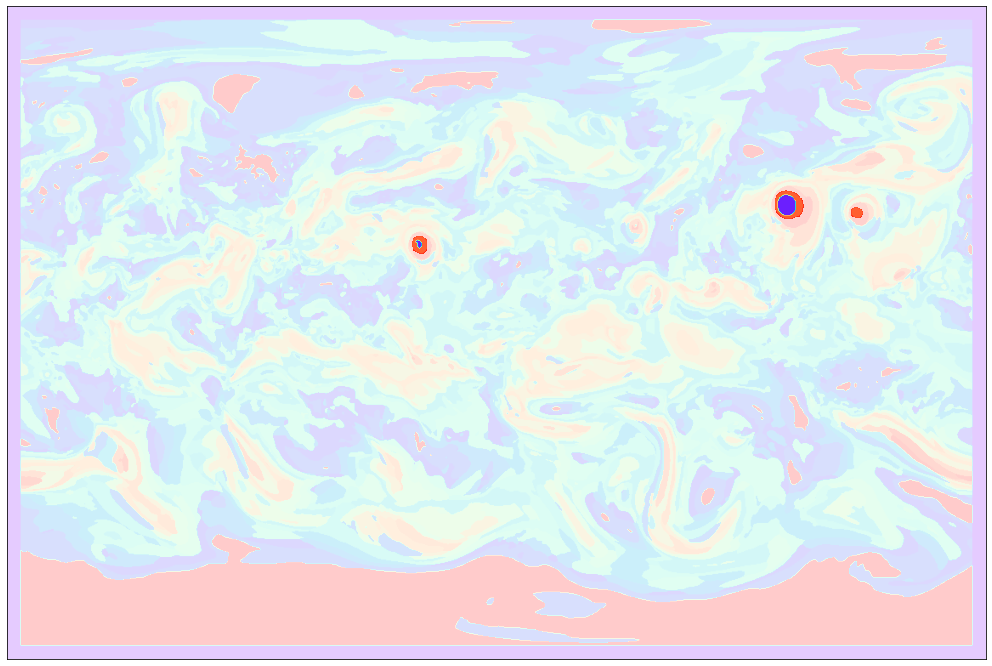

In [8]:
H,W = np.shape(tmq[0])
size = 18
fig, ax = plt.subplots(figsize = (size, (H/W)*size))
ax.imshow(ivt_states[0], cmap=plt.cm.rainbow)
ax.imshow(masked, cmap=plt.cm.Greys, alpha=0.8)
ax.invert_yaxis()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('ivt_masked_states-8.pdf', bbox_inches='tight')

<AxesSubplot:>

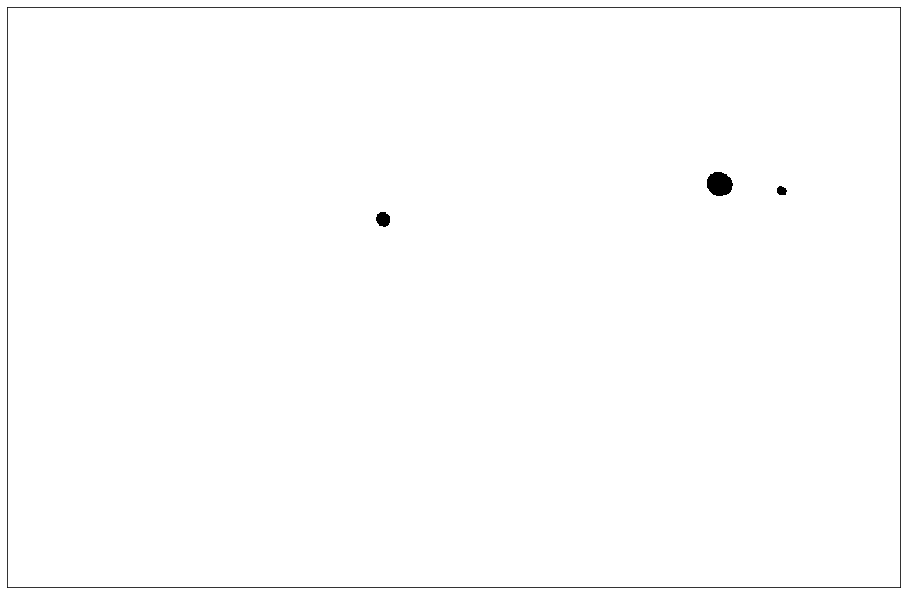

In [22]:
diagram(maskedIVT[0], ticks=False, invert_y=False, cmap=plt.cm.Greys)

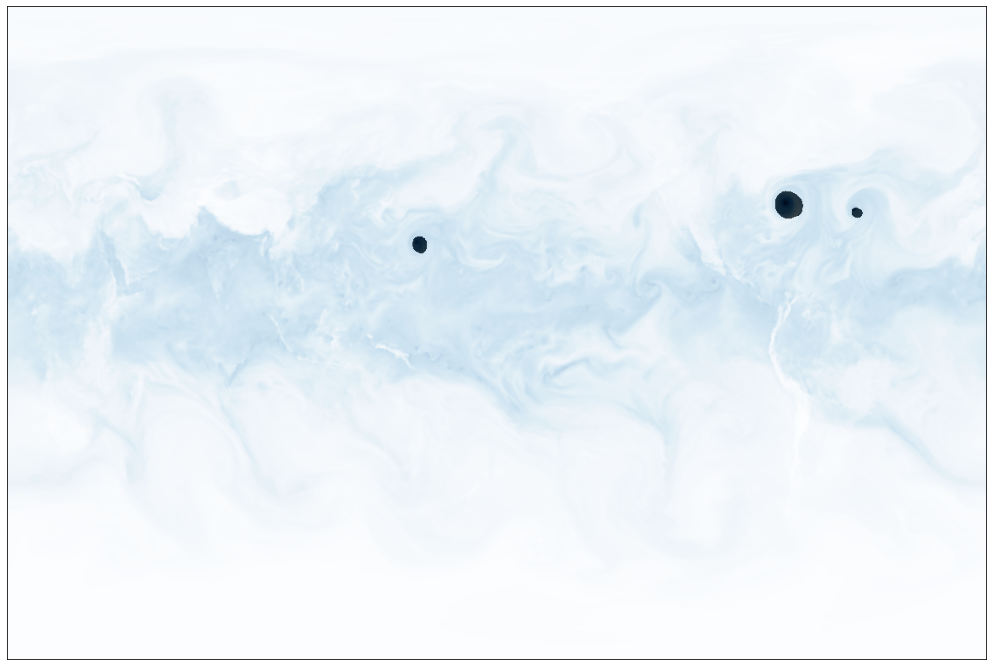

In [25]:
H,W = np.shape(tmq[0])
size = 18
fig, ax = plt.subplots(figsize = (size, (H/W)*size))
ax.imshow(tmq[0], cmap=plt.cm.Blues)
ax.imshow(maskedIVT[0], cmap=plt.cm.Greys, alpha=0.7)
ax.invert_yaxis()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('ivt_states_overlay-8_dark.pdf', bbox_inches='tight')

## IVT_alt Decomposition (multivariate analysis)

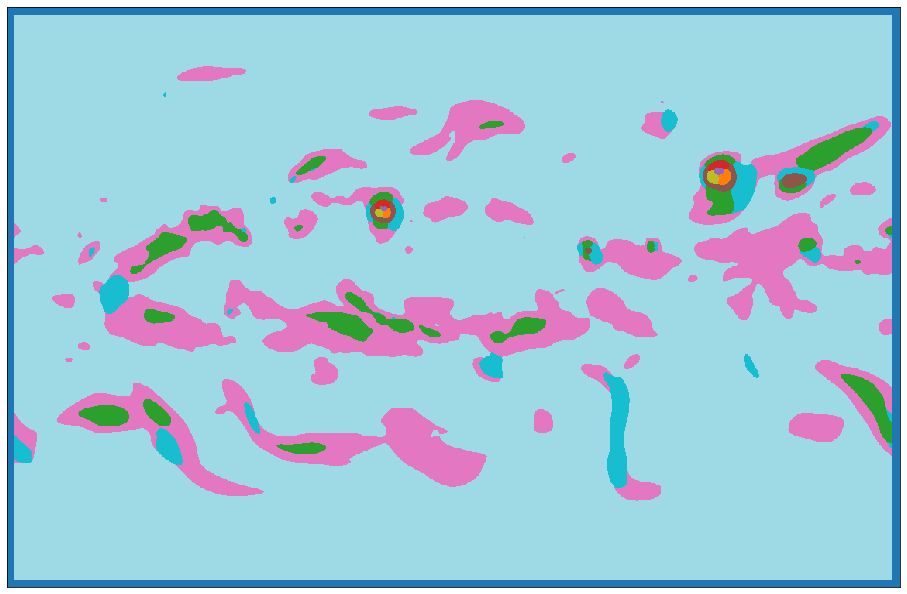

In [20]:
run = 12
ivt_alt = load_state_fields('IVT_alt', run, 100, 120)
diagram(ivt_alt[15], ticks=False, invert_y=False, cmap=plt.cm.tab20)
plt.savefig('ivt_alt_states-12.pdf', bbox_inches='tight')

1, 3, 4, 5(brown), 7, 8, 

<AxesSubplot:>

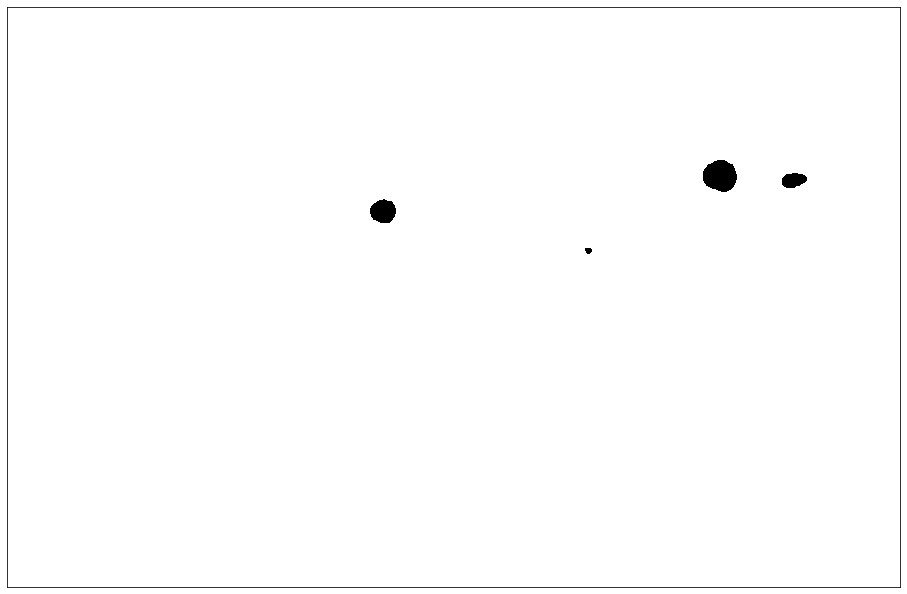

In [21]:
maskedIVT = np.zeros(np.shape(ivt_alt), dtype=int)
maskedIVT[ivt_alt==1] = 1
maskedIVT[ivt_alt==3] = 1
maskedIVT[ivt_alt==4] = 1
maskedIVT[ivt_alt==5] = 1
maskedIVT[ivt_alt==7] = 1
maskedIVT[ivt_alt==8] = 1
diagram(maskedIVT[15], ticks=False, invert_y=False, cmap=plt.cm.Greys)

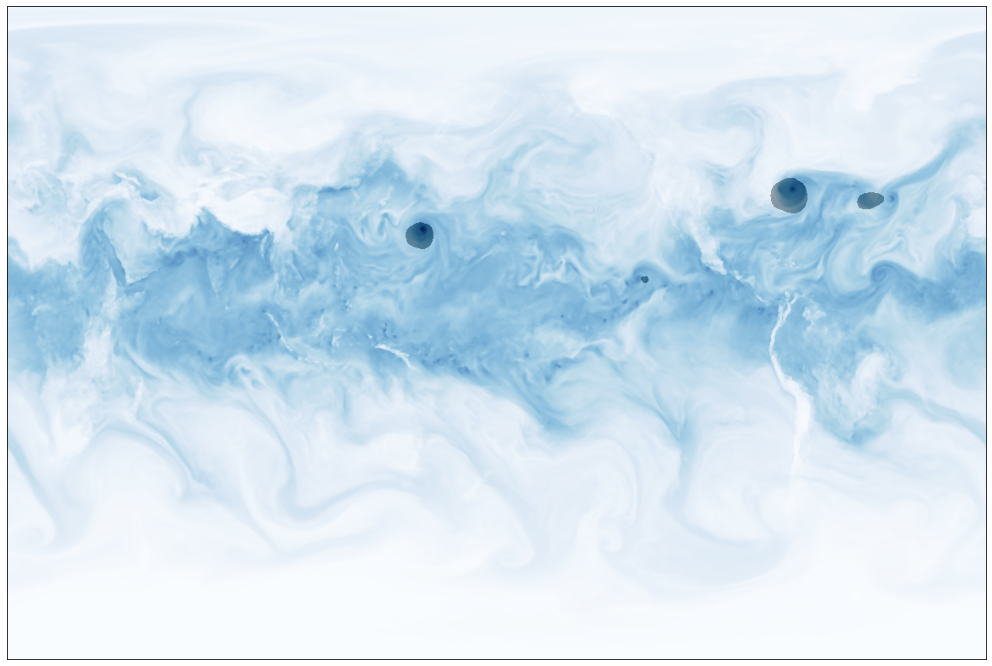

In [22]:
H,W = np.shape(tmq[0])
size = 18
fig, ax = plt.subplots(figsize = (size, (H/W)*size))
ax.imshow(tmq[15], cmap=plt.cm.Blues)
ax.imshow(maskedIVT[15], cmap=plt.cm.Greys, alpha=0.3)
ax.invert_yaxis()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('ivt_alt_mask-12.pdf', bbox_inches='tight')

<AxesSubplot:>

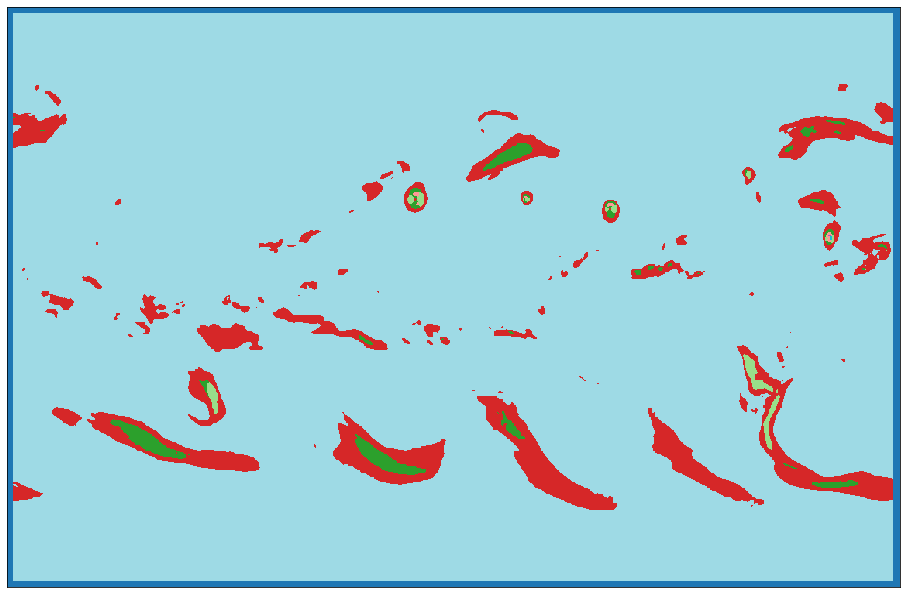

In [13]:
run = 19
ivt_alt = load_state_fields('IVT_alt', run, 380, 400)
diagram(ivt_alt[12], ticks=False, invert_y=False, cmap=plt.cm.tab20)
# plt.savefig('ivt_alt_states-19.pdf', bbox_inches='tight')

<AxesSubplot:>

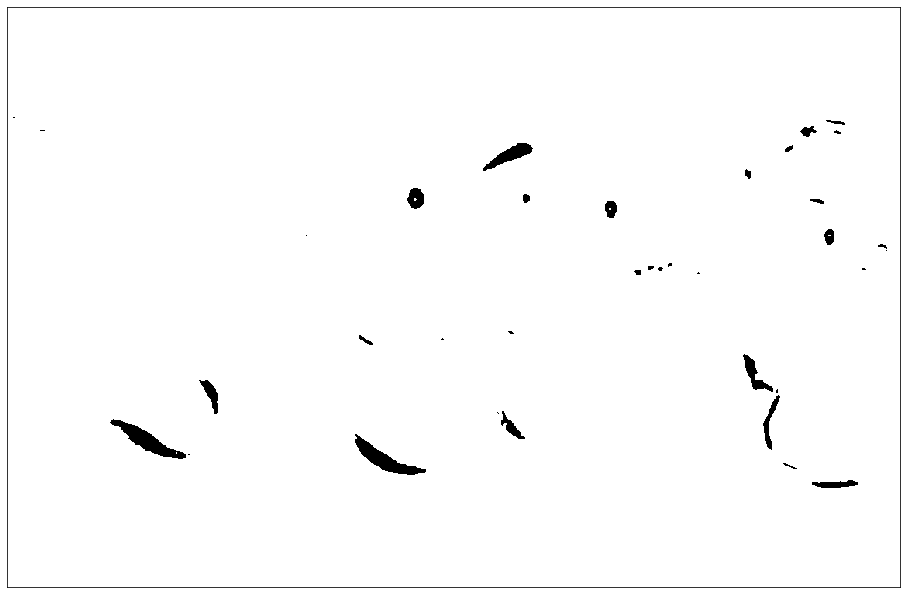

In [14]:
maskedIVT = np.zeros(np.shape(ivt_alt), dtype=int)
maskedIVT[ivt_alt==7] = 1
maskedIVT[ivt_alt==18] = 1
maskedIVT[ivt_alt==5] = 1
maskedIVT[ivt_alt==4] = 1
diagram(maskedIVT[12], ticks=False, invert_y=False, cmap=plt.cm.Greys)

<ipython-input-3-fec1c16bf066>:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obs_load = Dataset(run_dir+obs_name, 'r')[observable][:]


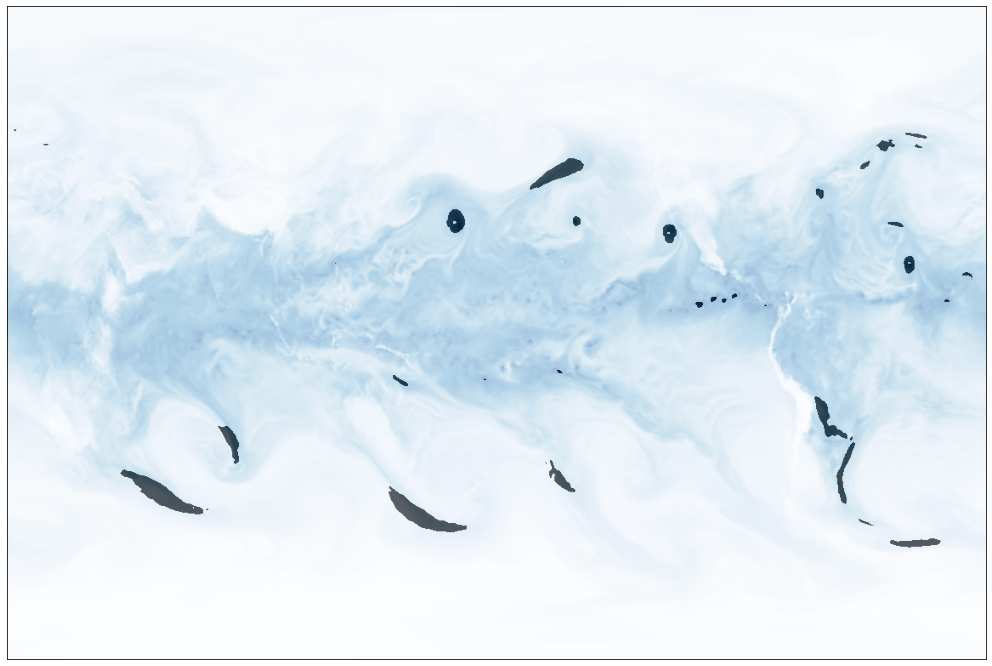

In [16]:
tmq, tmq_states = load_fields('TMQ', 8, 380, 400)
H,W = np.shape(tmq[0])
size = 18
fig, ax = plt.subplots(figsize = (size, (H/W)*size))
ax.imshow(tmq[4], cmap=plt.cm.Blues)
ax.imshow(maskedIVT[12], cmap=plt.cm.Greys, alpha=0.6)
ax.invert_yaxis()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('ivt_alt_mask-19_dark.pdf', bbox_inches='tight')